# Математический анализ 3. Практика

# Стохастический градиентный и координатный спуски

## Загрузка и подготовка данных (1 балл)

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [606]:
#ваш код 

#Загружаем необходимые библиотеки
import pandas as pd
import numpy as np

#Загружаем данные
data = pd.read_csv('data/Advertising.csv',  index_col=0)
display(data.head())

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [607]:
#ваш код 

#Проверяем пропуски в данных
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


None

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [608]:
#ваш код 

#Разделяем данные на предикторы и целевую переменную
X = data.drop(['sales'], axis=1)
y = data['sales']

#Преобразуем признаки в массивы NumPy
X = X.to_numpy()
y = y.to_numpy()

## Координатный спуск (2 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [609]:
import numpy as np

#Добавляем единичный столбец
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [610]:
#Нормализуем данные
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:**

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [611]:
# ваш код 

#количество итераций
num_iters = 1000
#количество строк в матрице X 
m = 200
#количество столбцов в матрице X 
n = 4
#вектор размера nx1, состояющий из нулей 
w = np.zeros((n,1)) 

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))
print(w.T) 
  
    

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [612]:
#Загружаем необходимую библиотеку
from sklearn.linear_model import LinearRegression

#Загружаем модель 
model = LinearRegression(fit_intercept=False)
#Обучаем модель
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (7 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение**

In [613]:
#ваш код

#Разделяем данные на предикторы и целевую переменную
X = data.drop(['sales'], axis=1)
y = data['sales']

#Преобразуем признаки в массивы NumPy
X = X.to_numpy()
y = y.to_numpy()

#Масштабируем столбцы исходной матрицы
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)


**Добавим единичный столбец**

In [614]:
#Добавляем единичный столбец
X_scaled = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse**

In [615]:
#ваш код
#Создаем функцию для вычисления MSE
def mse_error(y, y_pred):
    MSE = np.mean((y - y_pred) ** 2)
    return MSE 

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза**

In [616]:
#ваш код
#Делаем наивный прогноз
y_pred = X_scaled.mean()

mse = mse_error(y, y_pred)
print(mse)


216.7675


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов**

In [617]:
#ваш код
#Создаем функцию которая получает вектор прогнозов
def lin_pred(X, w):
    y_pred = X @ w
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.  
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [618]:
#ваш код

#Создаем функцию для реализации шага 
#стохастического градиентного спуска
def stoch_grad_step(X, y, w, train_ind, eta):
    x_i = X[train_ind]  # вектор признаков объекта
    y_i = y[train_ind]  # целевое значение
    prediction = x_i @ w  # прогноз для объекта
    error = prediction - y_i  # ошибка
    gradient = error * x_i  # градиент для одного объекта
    w_new = w - eta * gradient  # обновление весов
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [619]:
# ваш код
#Создаем функцию для реализации 
#стохастического градиентного спуска
def stochastic_gradient_descent(X, y, w0, eta, k, norm_end):
    w = w0.copy()  # работаем с копией
    mse_list = []
    j = 0 # номер итерации
    norm = np.inf

    while (norm > norm_end) and (j < k):  # условие остановки: норма мала И лимит итераций
        i = np.random.randint(len(y))  # случайный индекс
        y_pred = lin_pred(X, w)  # прогноз до обновления
        mse_list.append(mse_error(y, y_pred))  # сохраняем ошибку
        
        # обновляем веса
        w_new = stoch_grad_step(X, y, w, i, eta)
        norm = np.linalg.norm(w_new - w)  # норма изменения весов
        w = w_new  # переходим к новым весам
        j += 1

    return w, np.array(mse_list), j

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

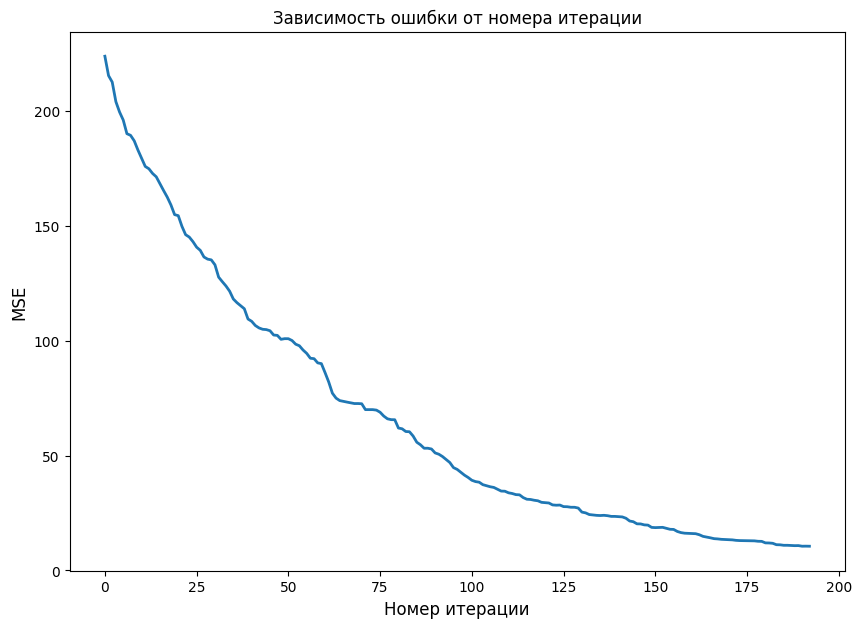

In [620]:
# ваш код
#Запускаем функцию стохастического 
#градиентного спуска
SGD = stochastic_gradient_descent(
    X_scaled, y,
    w0=np.zeros(X_scaled.shape[1]),  # правильная форма
    eta=0.01, k=10000, norm_end=0.001
)

#Строим график зависимости ошибки от номера итерации
import matplotlib.pyplot as plt
import seaborn as sns
#График
plt.figure(figsize=(10,7))
plt.plot(range(SGD[2]), SGD[1], linewidth=2);

plt.xlabel('Номер итерации', fontsize = 12);
plt.ylabel('MSE', fontsize = 12);
plt.title('Зависимость ошибки от номера итерации', fontsize = 12);
plt.show()


**Выведите вектор весов, к которому сошелся метод.**

In [621]:
# ваш код
#Выводим вектор весов
display(SGD[0])

array([11.78112747,  2.58432077,  1.80584338,  0.57295854])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [622]:
#Выводим MSE последней итерации
display(SGD[1][-1].round(3))

10.556